# Proyecto 1: Analítica computacional para la toma de decisiones
Carolina Rodríguez

Gabriela Martínez

Wilmar Calderón

Tarea 2: Alistamiento de Datos

In [1]:
#Importation of all the relevant Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Reading of the comma delimited text
df=pd.read_csv('.\\data.txt')

In [3]:
#Indexation of the rows where wip is null and the incentive is 0. Incentive>0 for wip==null identified as outliers
dropable=df[(df['wip'].isnull()) & (df['incentive']>0)]
print(dropable.index.values)
#Dropping of the rows with outlier
df_fin=df
df_fin.iloc[dropable.index.values,8]=df.iloc[dropable.index.values,9]
df_fin.iloc[dropable.index.values,9]=0

#modification of null to 0 in the wip. From the variable characteristic, as it relates to the missing products to be finished, 
#an empty value would be considered as 0.
df_fin['wip'].fillna(0, inplace=True)

[1128 1129 1130 1133 1137 1138 1139 1143 1148 1149]


In [4]:
#Update of the datatypes of the dataframe. Date: datetime, no_of_workers: int, department is cleared from any space to avoid multiple categories.
df_fin['date']= pd.to_datetime(df_fin['date'])
df_fin['no_of_workers']=df_fin['no_of_workers'].astype(int)
df_fin['department'] = df_fin['department'].str.strip()

In [5]:
#Print details of the variables
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Tarea 3: Exploración de Datos

In [6]:
#description of the loaded data (null values eliminated)
df_fin.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,687.228070,4579.991646,25.679198,0.730159,0.369256,0.150376,34.551378,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1514.582341,3335.480597,30.375119,12.709757,3.268987,0.427848,22.152559,0.174488


['targeted_productivity' 'smv' 'wip' 'over_time' 'incentive' 'idle_time'
 'idle_men' 'no_of_style_change' 'no_of_workers' 'actual_productivity']


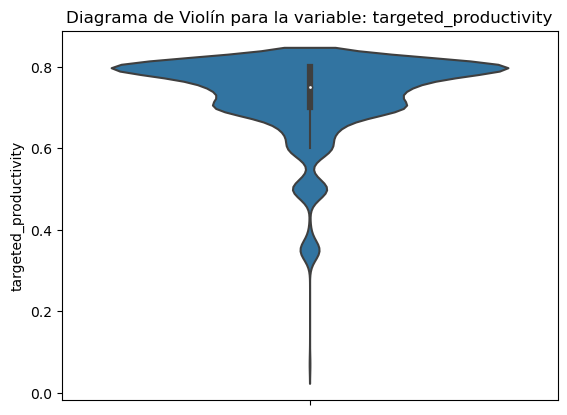

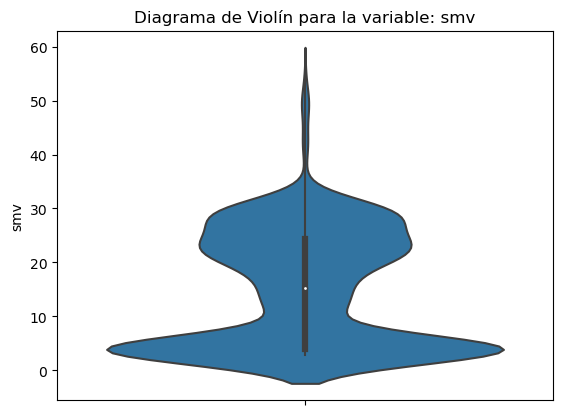

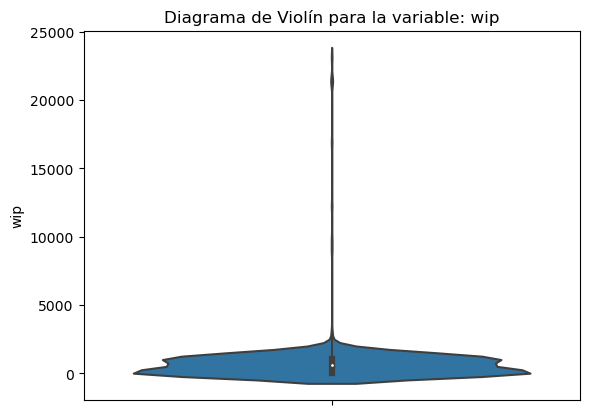

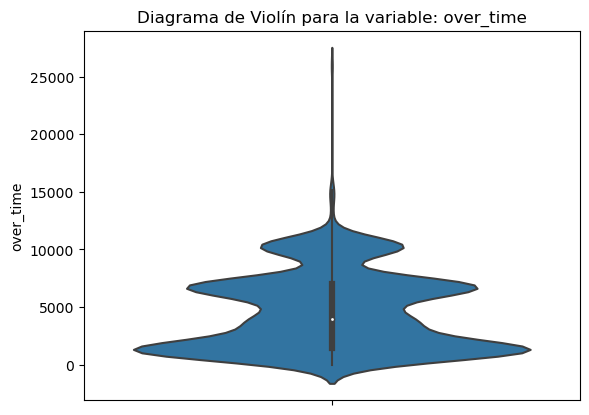

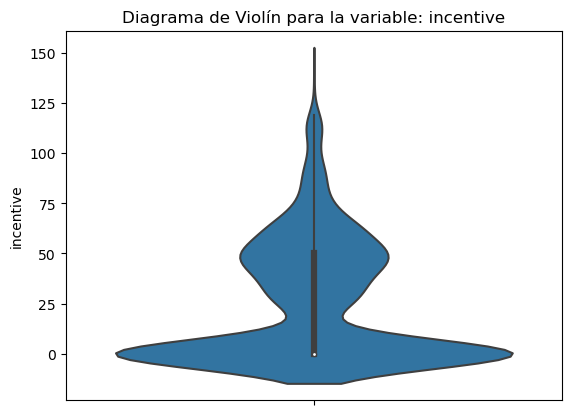

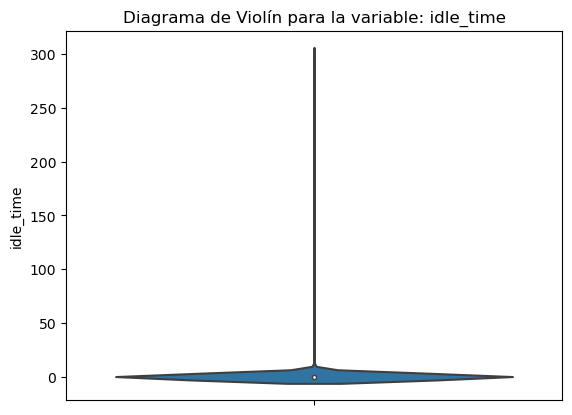

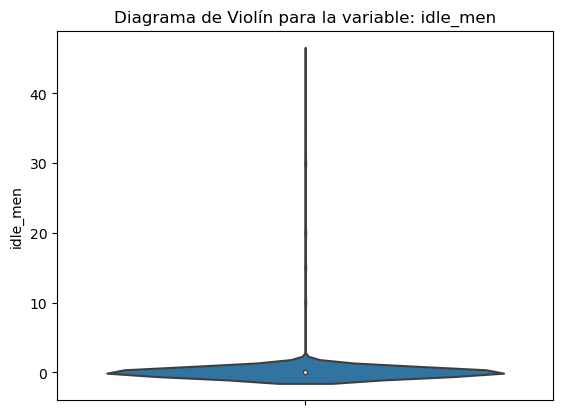

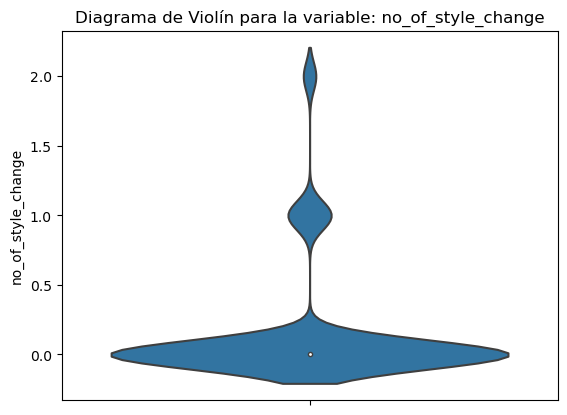

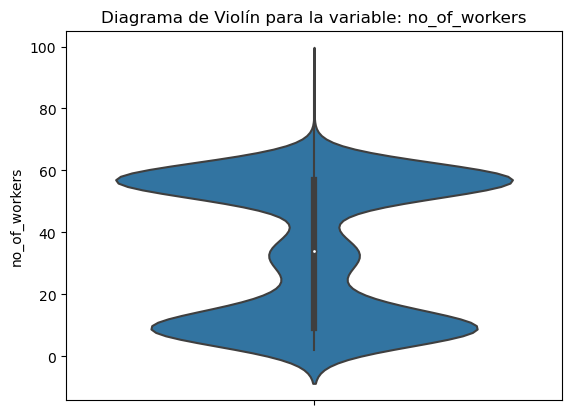

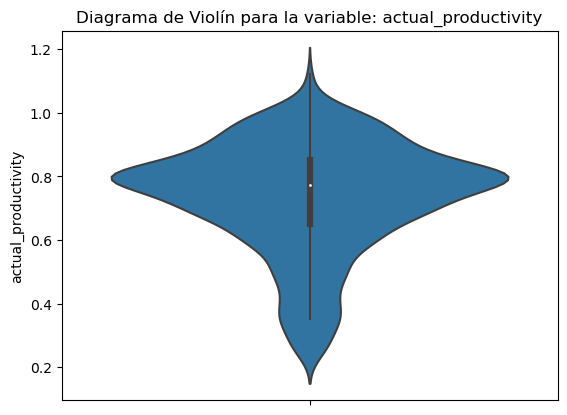

In [7]:
import seaborn as sns
#creation of the box-whiskers plots for the numerical variables.
cols=df_fin.columns.values
cols=np.delete(cols,[0,1,2,3,4])
print(cols)
for col in cols:
    plt.figure()
    sns.violinplot(data=df_fin, y=df_fin[col],inner_kws=dict(box_width=15, whis_width=2, color=".8"))
    plt.title("Diagrama de Violín para la variable: "+col)

['quarter' 'department' 'day' 'team']


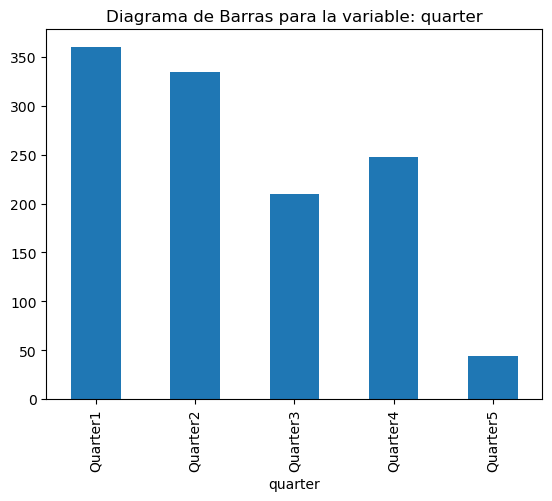

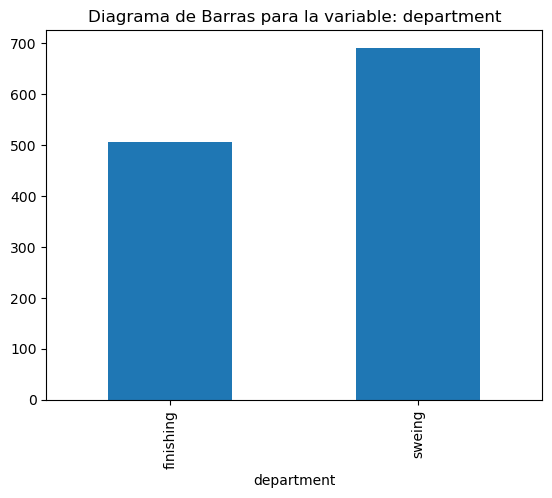

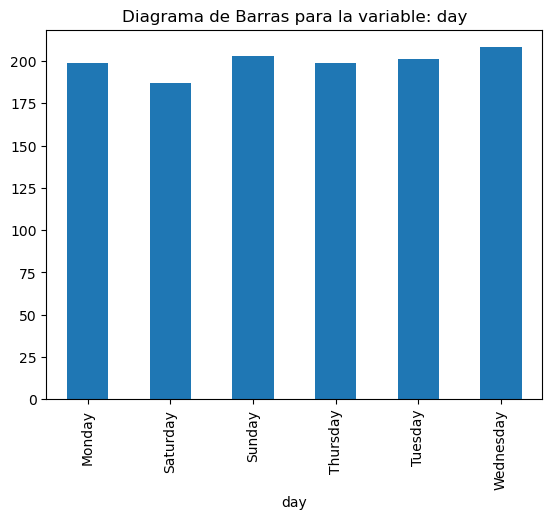

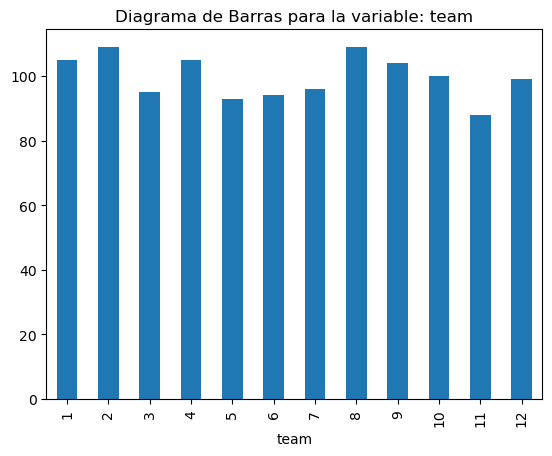

In [8]:
#creation of the box-whiskers plots for the numerical variables.
cols=df_fin.columns.values
cols=np.delete(cols,[0,5,6,7,8,9,10,11,12,13,14])
print(cols)

for col in cols:
    uns= df_fin.groupby(col)[col].count()
    plt.figure()
    uns.plot.bar()
    plt.title("Diagrama de Barras para la variable: "+col)

In [9]:
#Groupby the date (day) to understand how different variables changes during time
daily_data=df_fin.groupby("date")

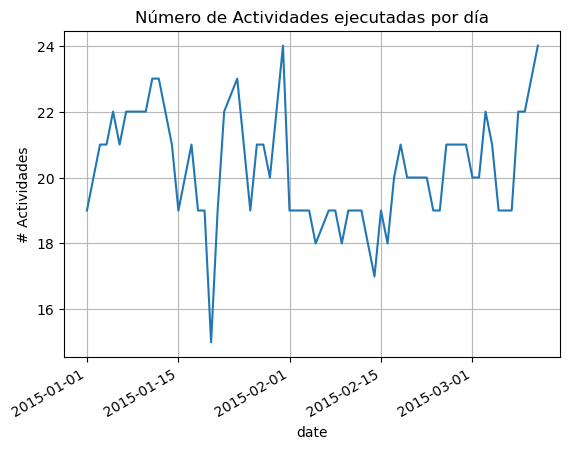

In [10]:
daily_act=daily_data.count()["team"]
plt.figure()
daily_act.plot()
plt.ylabel("# Actividades")
plt.title("Número de Actividades ejecutadas por día")
plt.grid(True, alpha=0.9)
plt.show()

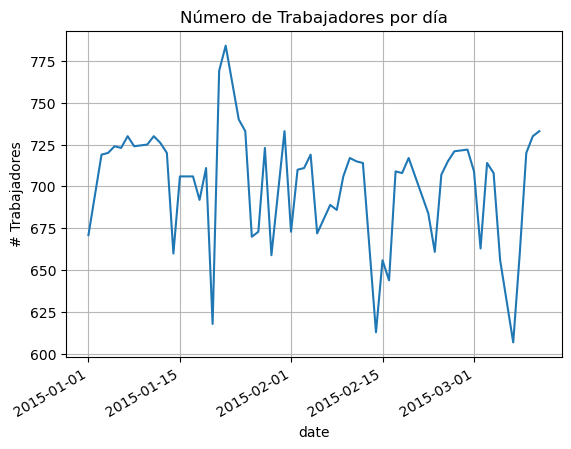

In [11]:
#review of quantity of workers during the time lapse studied
no_of_work=daily_data.sum()['no_of_workers']
plt.figure()
no_of_work.plot()
plt.ylabel("# Trabajadores")
plt.title("Número de Trabajadores por día")
plt.grid(True, alpha=0.9)
plt.show()

In [ ]:
daily_act=daily_data.sum()["incentive"]
plt.figure()
daily_act.plot()
plt.ylabel("Incentive")
plt.title("Pago de Incentivos diarios")
plt.grid(True, alpha=0.9)
plt.show()

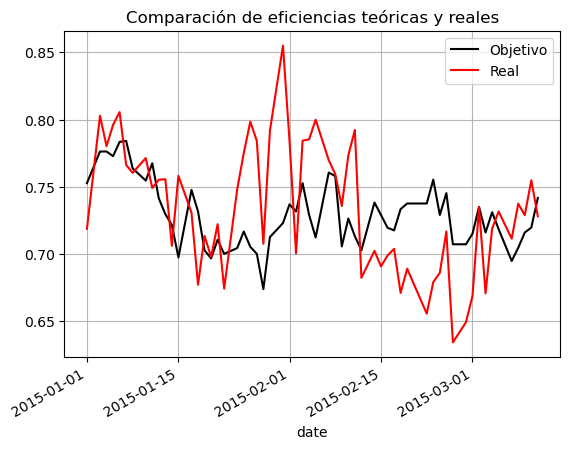

In [12]:
#comparisson between the targeted and the real productivity in the dates studied
target_eff=daily_data['targeted_productivity'].mean()
real_eff=daily_data['actual_productivity'].mean()
plt.figure()
target_eff.plot(c="black", label="Objetivo")
real_eff.plot(c="red", label="Real")
plt.legend()
plt.title("Comparación de eficiencias teóricas y reales")
plt.grid(True,alpha=0.9)
plt.show()

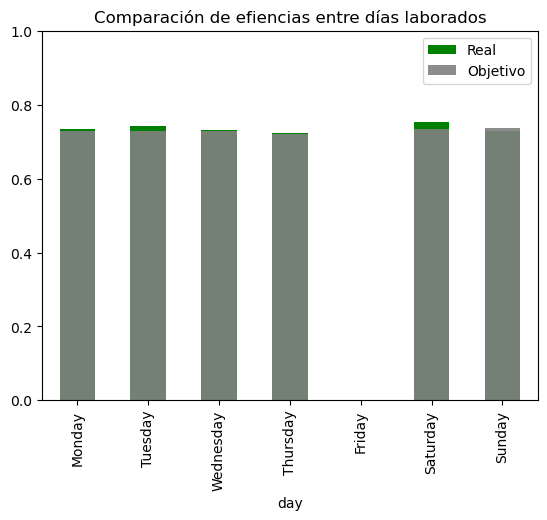

In [13]:
#Review of efficiencies during the week days (average efficiencies)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_data=df_fin.groupby("day")
real_eff_w=weekly_data['actual_productivity'].mean().reindex(cats)
target_eff_w=weekly_data['targeted_productivity'].mean().reindex(cats)

plt.figure()
real_eff_w.plot(kind="bar",label="Real",color="green")
target_eff_w.plot(kind="bar",color="grey",label="Objetivo",alpha=0.9)
plt.legend()
plt.ylim([0,1])
plt.title("Comparación de efiencias entre días laborados")
plt.show()

Text(0.5, 1.0, 'Actividades realizadas y número de veces repetidas')

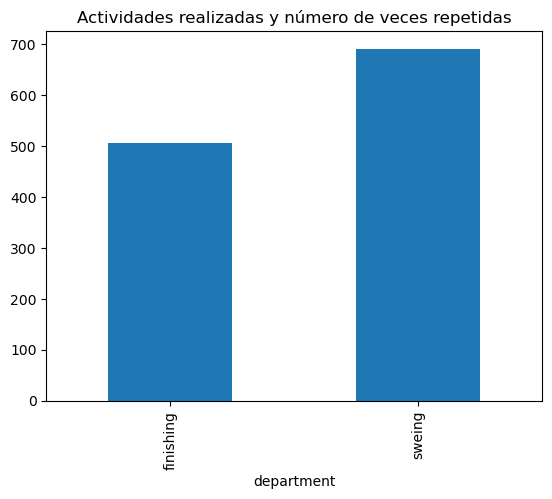

In [14]:
#comparisson of registers from the different activities performed
tasks=df_fin.groupby("department").count()

plt.figure()
tasks["team"].plot(kind="bar")
plt.title("Actividades realizadas y número de veces repetidas")

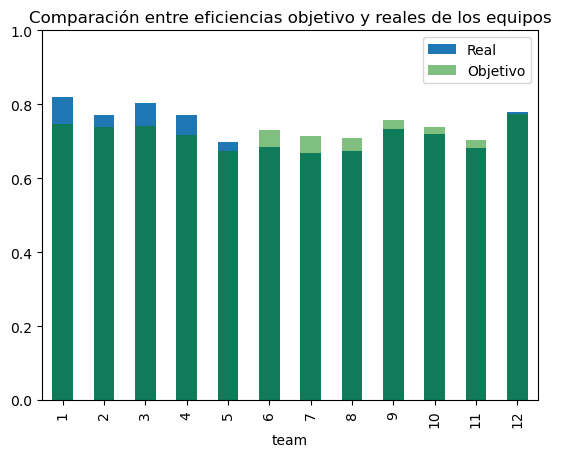

In [15]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['actual_productivity'].mean()
target_eff_t=team_data['targeted_productivity'].mean()

plt.figure()
real_eff_t.plot(kind="bar",label="Real")
target_eff_t.plot(kind="bar",color="green",alpha=0.5, label="Objetivo")
plt.ylim([0,1])
plt.legend()
plt.title("Comparación entre eficiencias objetivo y reales de los equipos")
plt.show()

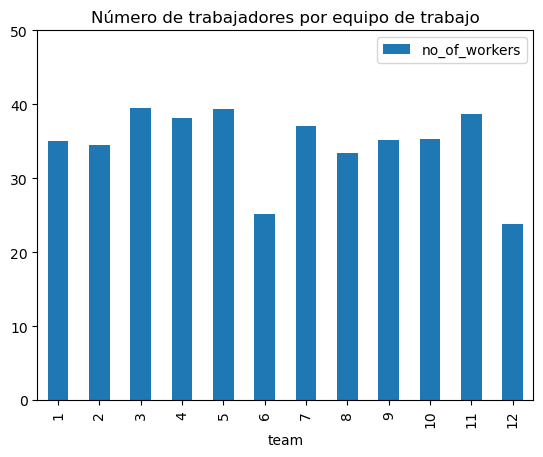

In [16]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['no_of_workers'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
plt.legend()
plt.title("Número de trabajadores por equipo de trabajo")
plt.ylim([0,50])
plt.show()

{(1, 'finishing'): [1, 23, 42, 61, 84, 104, 126, 148, 173, 193, 217, 241, 261, 281, 368, 383, 413, 418, 442, 469, 480, 507, 524, 545, 575, 583, 603, 626, 642, 660, 675, 698, 725, 738, 755, 766, 873, 948, 969, 1002, 1023, 1041, 1051, 1072, 1098, 1109, 1139, 1155, 1177], (1, 'sweing'): [9, 24, 49, 70, 88, 106, 130, 162, 175, 198, 221, 250, 264, 287, 316, 333, 364, 377, 402, 424, 447, 467, 483, 508, 535, 544, 561, 581, 605, 619, 639, 658, 677, 695, 714, 730, 749, 768, 785, 803, 830, 846, 921, 939, 961, 979, 994, 1008, 1028, 1058, 1078, 1089, 1114, 1132, 1152, 1186], (2, 'finishing'): [6, 33, 52, 67, 91, 111, 134, 157, 179, 196, 226, 258, 279, 353, 384, 412, 417, 441, 468, 481, 511, 520, 547, 580, 602, 621, 636, 662, 674, 693, 716, 741, 767, 820, 825, 852, 866, 901, 920, 940, 956, 977, 1000, 1005, 1040, 1064, 1069, 1103, 1111, 1143, 1164, 1175], (2, 'sweing'): [8, 34, 50, 74, 92, 114, 136, 159, 182, 207, 229, 257, 277, 289, 312, 325, 344, 358, 374, 396, 423, 446, 456, 477, 498, 519, 543, 5

<Figure size 640x480 with 0 Axes>

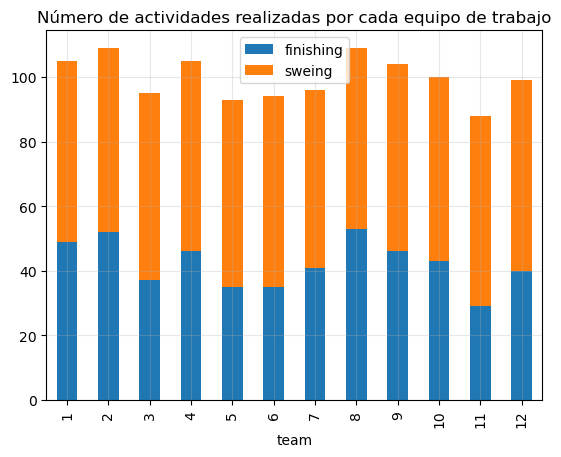

In [17]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby(["team",'department'])
print(team_data.groups)
real_eff_t=team_data['department'].count().unstack()
print(real_eff_t)
plt.figure()
real_eff_t.plot(kind="bar",stacked=True)
plt.legend()
plt.grid(True,alpha=0.3)
plt.title("Número de actividades realizadas por cada equipo de trabajo")
plt.show()

{(1, 'finishing'): [1, 23, 42, 61, 84, 104, 126, 148, 173, 193, 217, 241, 261, 281, 368, 383, 413, 418, 442, 469, 480, 507, 524, 545, 575, 583, 603, 626, 642, 660, 675, 698, 725, 738, 755, 766, 873, 948, 969, 1002, 1023, 1041, 1051, 1072, 1098, 1109, 1139, 1155, 1177], (1, 'sweing'): [9, 24, 49, 70, 88, 106, 130, 162, 175, 198, 221, 250, 264, 287, 316, 333, 364, 377, 402, 424, 447, 467, 483, 508, 535, 544, 561, 581, 605, 619, 639, 658, 677, 695, 714, 730, 749, 768, 785, 803, 830, 846, 921, 939, 961, 979, 994, 1008, 1028, 1058, 1078, 1089, 1114, 1132, 1152, 1186], (2, 'finishing'): [6, 33, 52, 67, 91, 111, 134, 157, 179, 196, 226, 258, 279, 353, 384, 412, 417, 441, 468, 481, 511, 520, 547, 580, 602, 621, 636, 662, 674, 693, 716, 741, 767, 820, 825, 852, 866, 901, 920, 940, 956, 977, 1000, 1005, 1040, 1064, 1069, 1103, 1111, 1143, 1164, 1175], (2, 'sweing'): [8, 34, 50, 74, 92, 114, 136, 159, 182, 207, 229, 257, 277, 289, 312, 325, 344, 358, 374, 396, 423, 446, 456, 477, 498, 519, 543, 5

<Figure size 640x480 with 0 Axes>

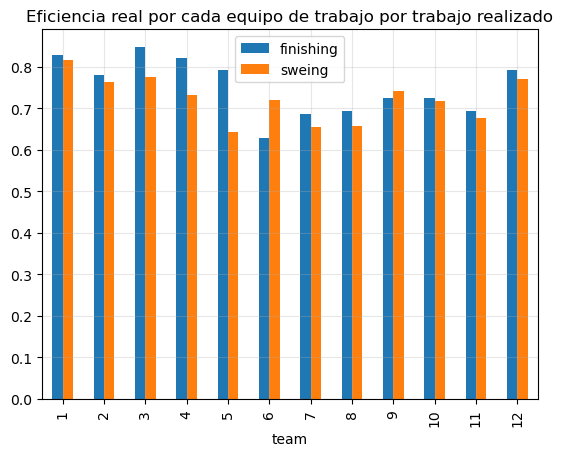

In [18]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby(["team",'department'])
print(team_data.groups)
real_eff_t=team_data['actual_productivity'].mean().unstack()
print(real_eff_t)
plt.figure()
real_eff_t.plot(kind="bar")
plt.legend()
plt.grid(True,alpha=0.3)
plt.title("Eficiencia real por cada equipo de trabajo por trabajo realizado")
plt.show()

c:\Users\wilma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wilma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wilma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wilma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

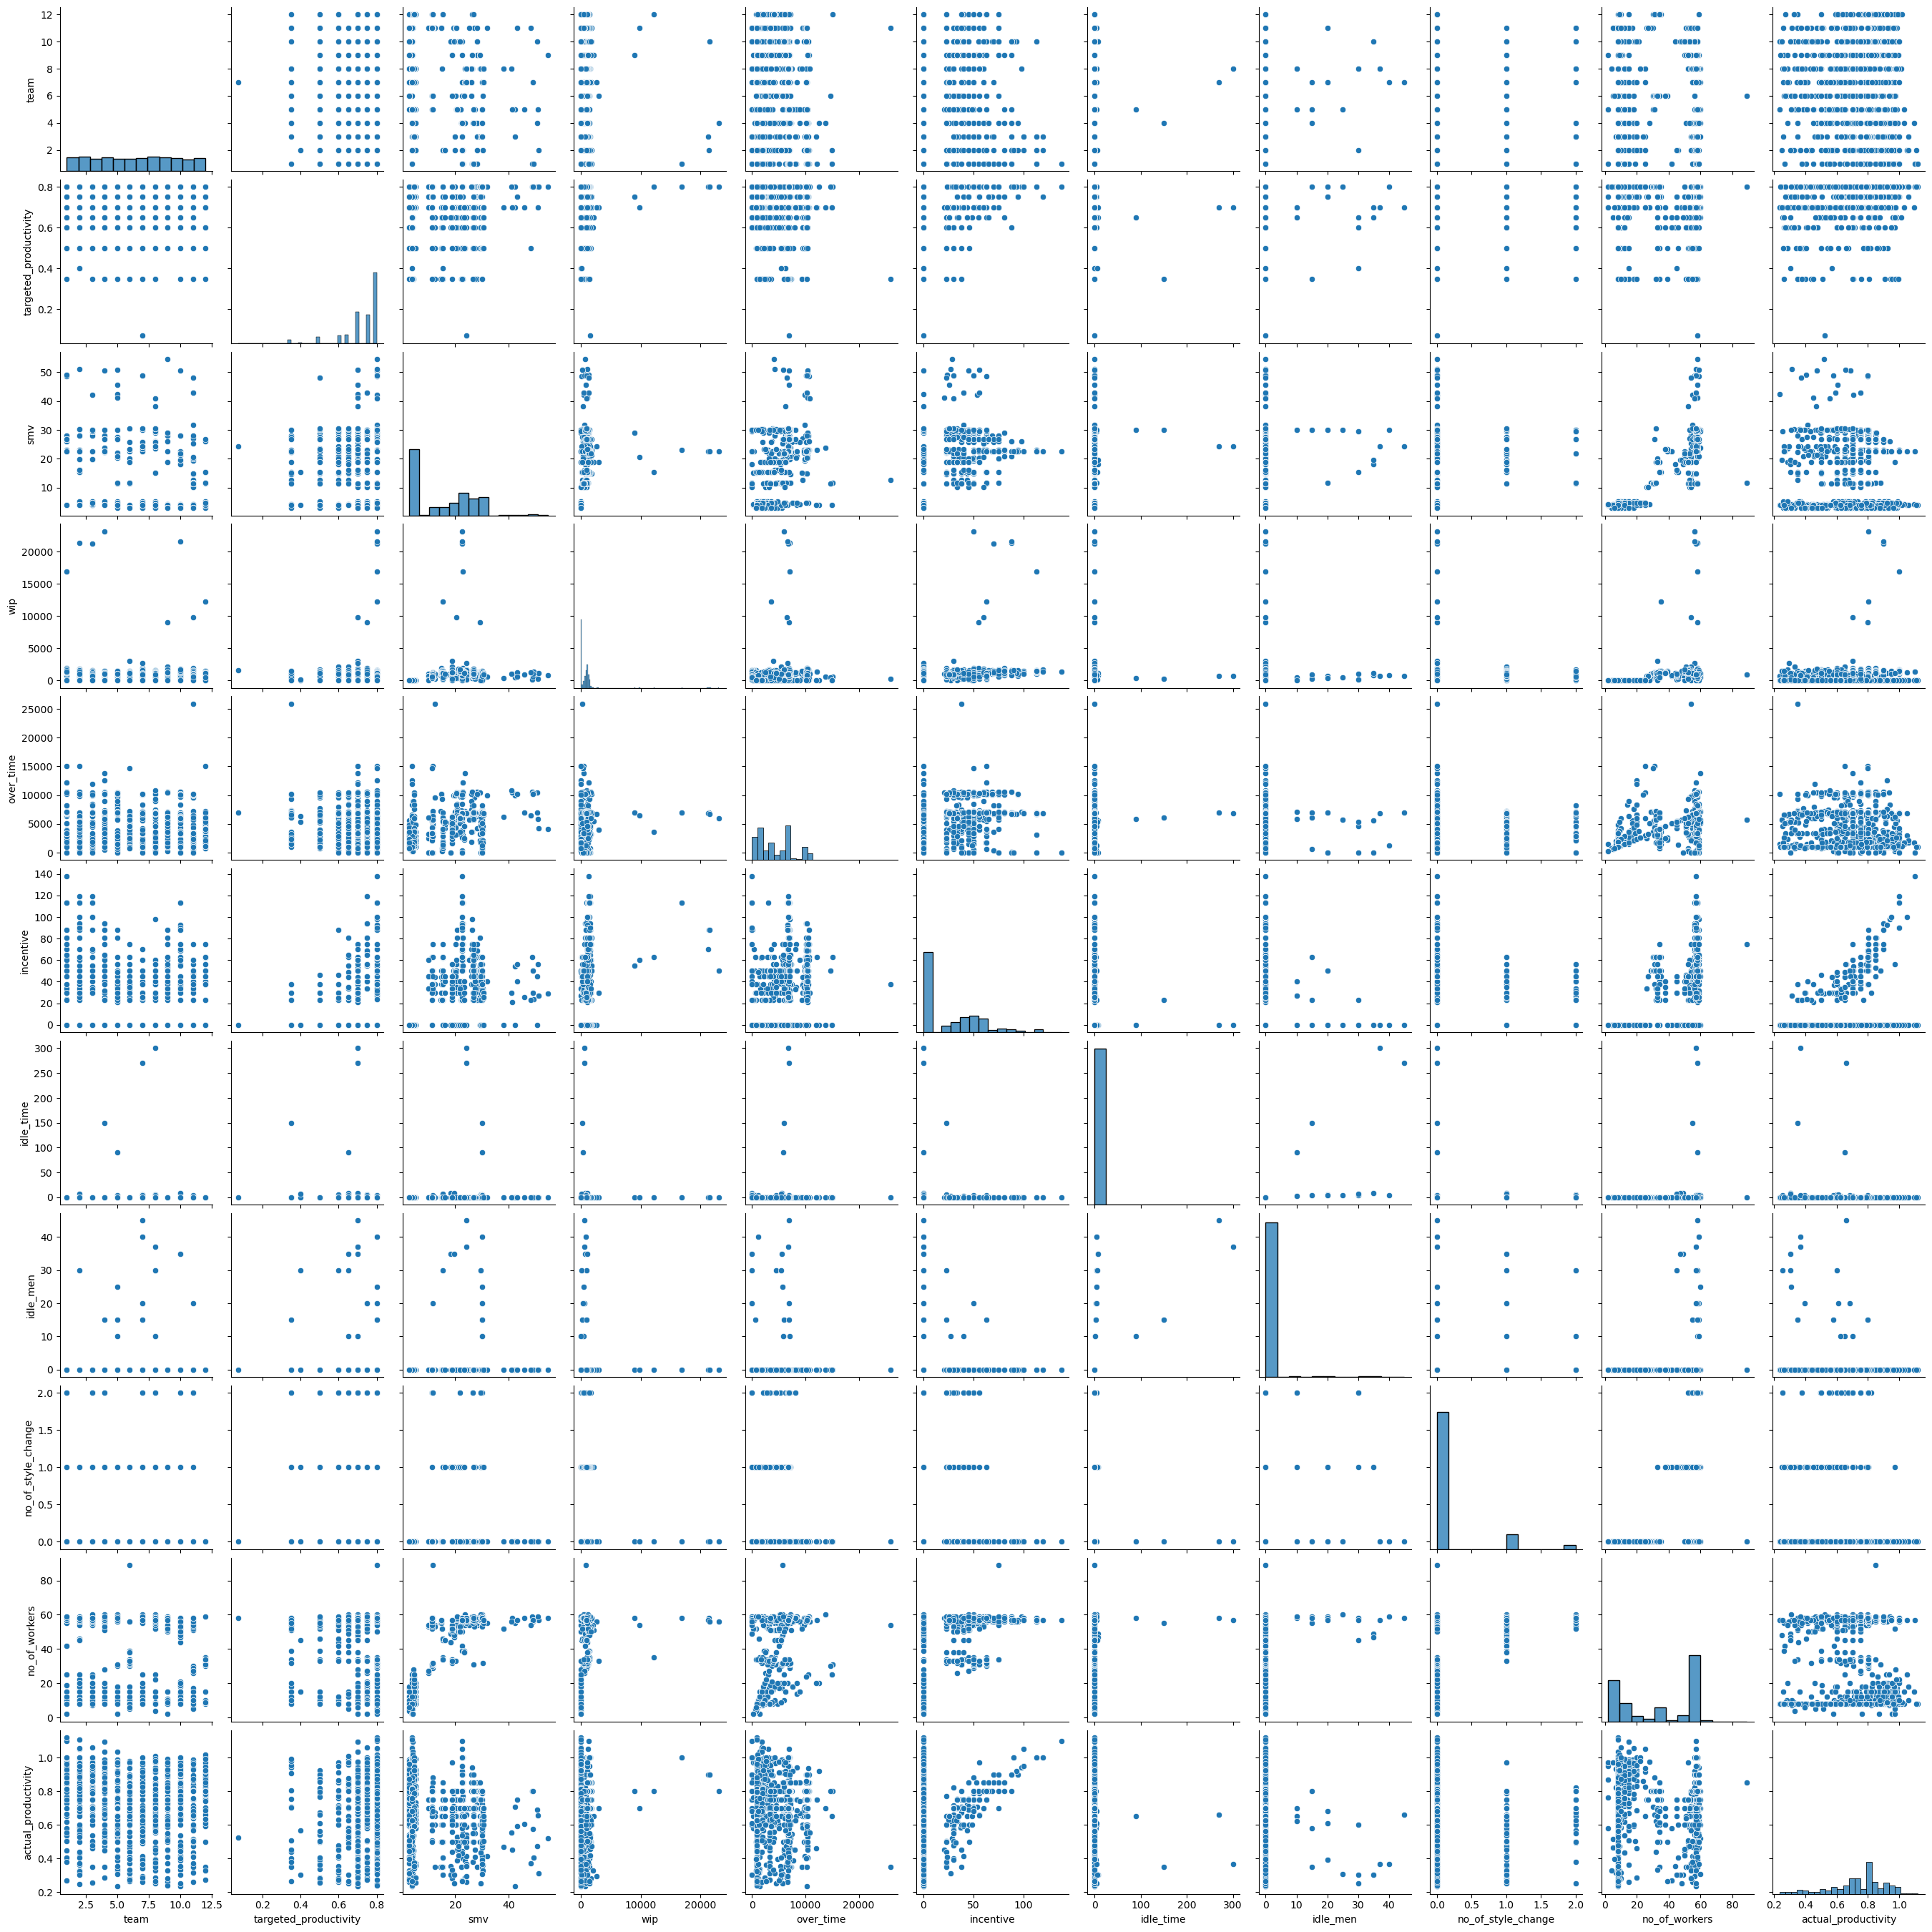

In [19]:
import seaborn as sns
df_val=df_fin.select_dtypes(exclude=['object'])
sns.pairplot(df_val)